In [1]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu
import STX3KO_analyses as stx

rng = np.random.default_rng()

%matplotlib inline


%load_ext autoreload
%autoreload 2

In [2]:
figdir = "/mnt/BigDisk/YMazeResults/neural/WTA"

In [26]:
nl_kwta = stx.wta.KWTA(eta=0, tau=0, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-3, w_max=10, ca3_sigma_mag=.05, n_winners=50 )
nl_ca1 = nl_kwta.run_trials()


In [4]:
print(nl_ca1.shape)

(100, 30, 1000)


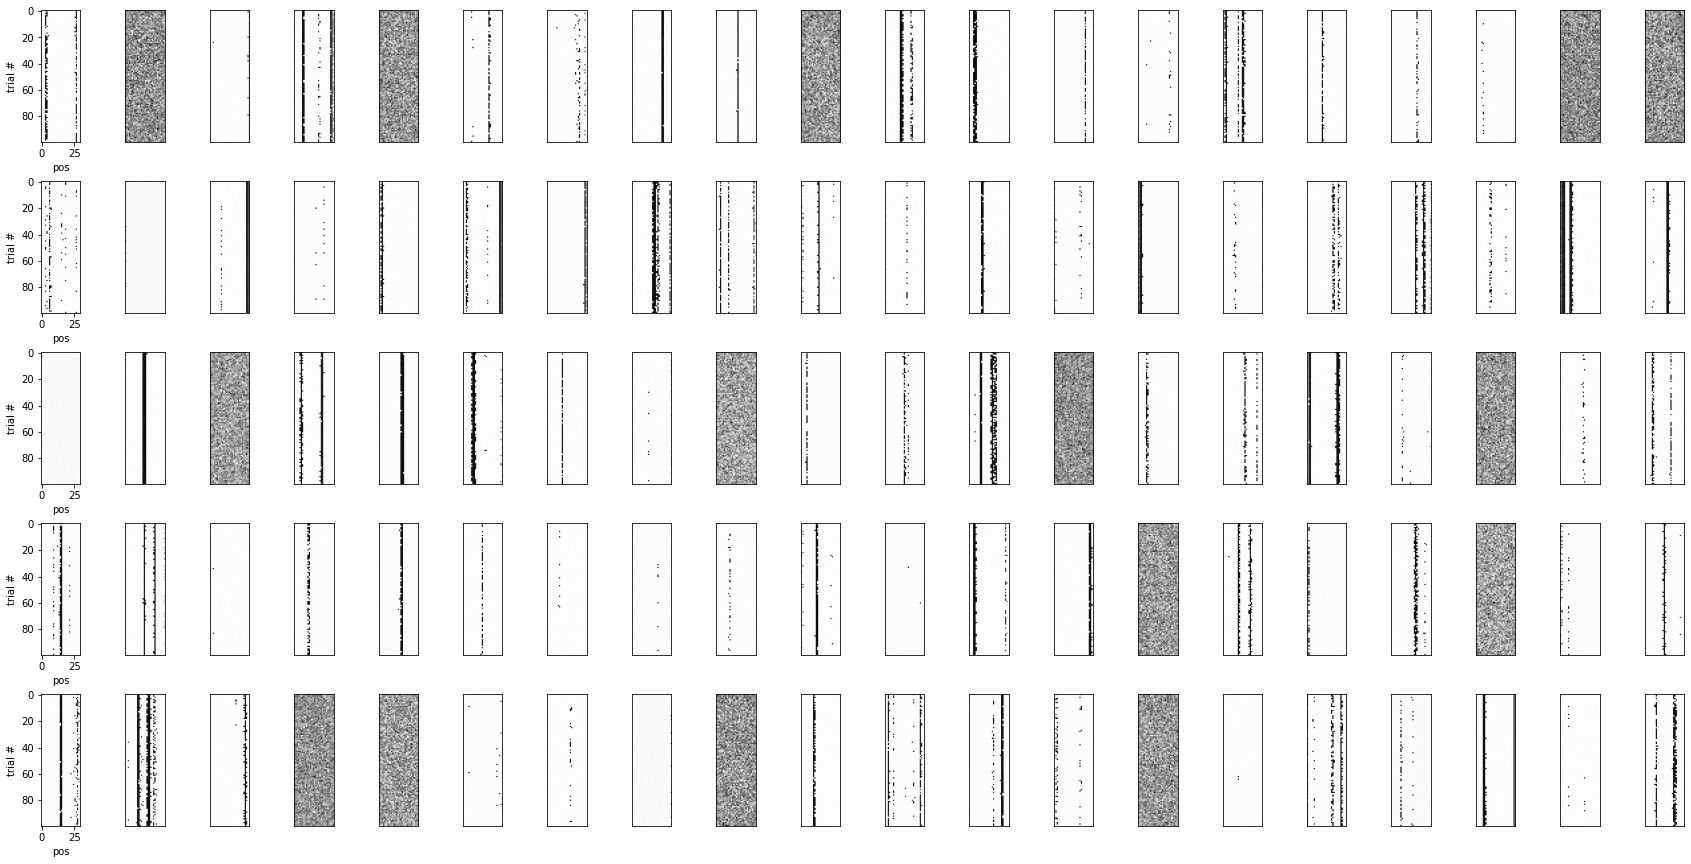

In [5]:
nl_singlecell_fig = stx.wta.plot_cells(nl_ca1, cell_inds = np.arange(0,100))
nl_singlecell_fig.savefig(os.path.join(figdir,"nolearn_single_cells.pdf"), format='pdf')

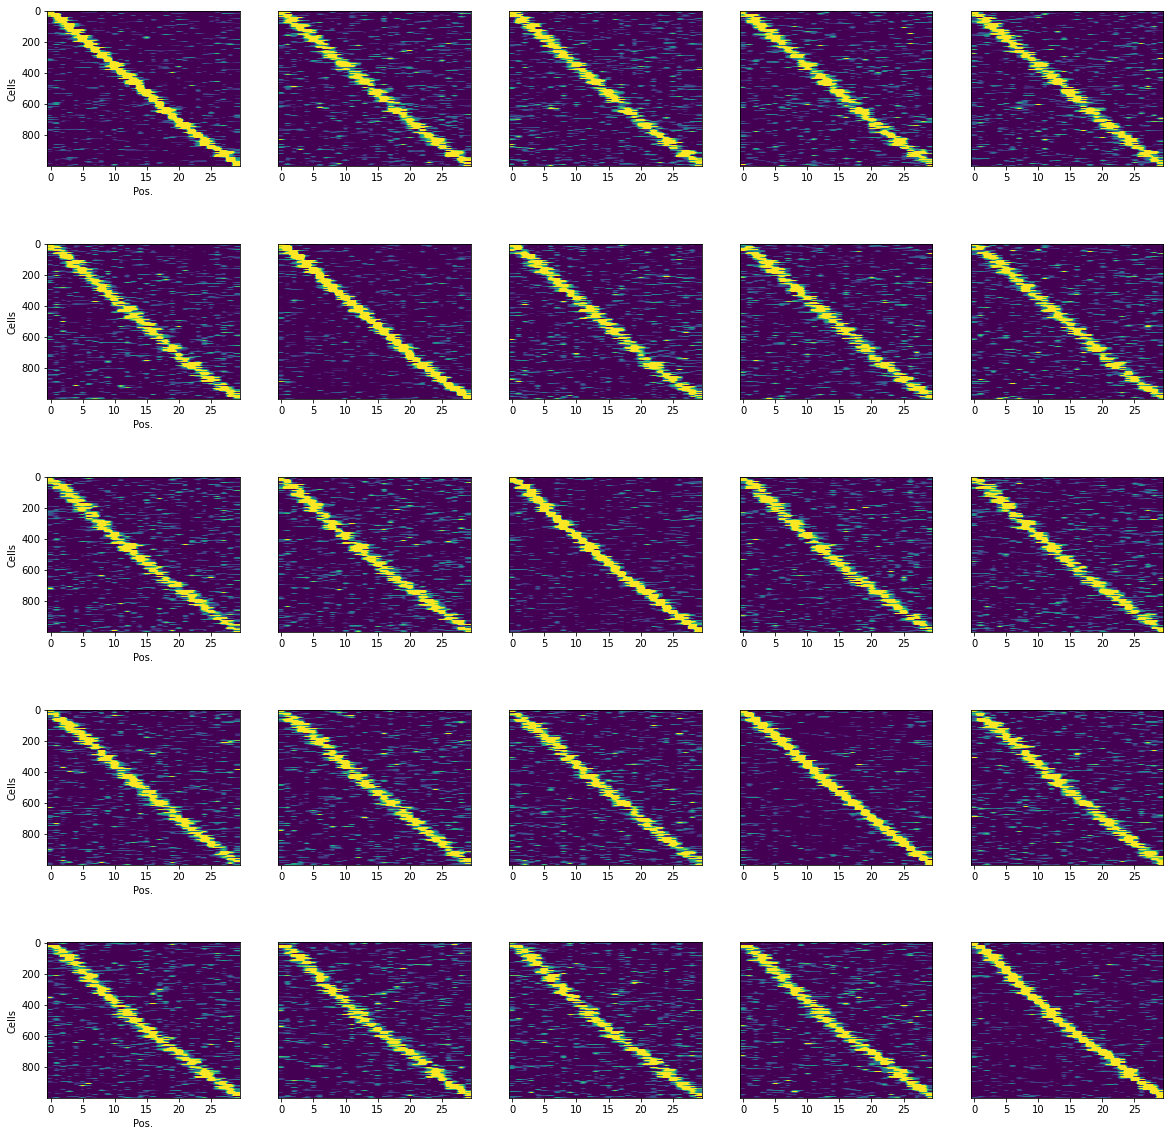

In [6]:
nl_pop_fig = stx.wta.plot_pop_activity(nl_ca1[::20,:,:])
nl_pop_fig.savefig(os.path.join(figdir, "nolearn_pop_placecells.pdf"), format='pdf')

In [7]:
l_kwta = stx.wta.KWTA(eta=1E-4, tau=0, w_norm_decay = 9E-4,ca1_noise= .5, w_sigma_mag = 1E-3, w_max=10, ca3_sigma_mag = .05, n_winners=50)
l_ca1 = l_kwta.run_trials()
# l_kwta.__dict__.update({'eta':0, 'tau':0, 'w_norm_decay': 0})
# l_ca1 = l_kwta.run_trials()

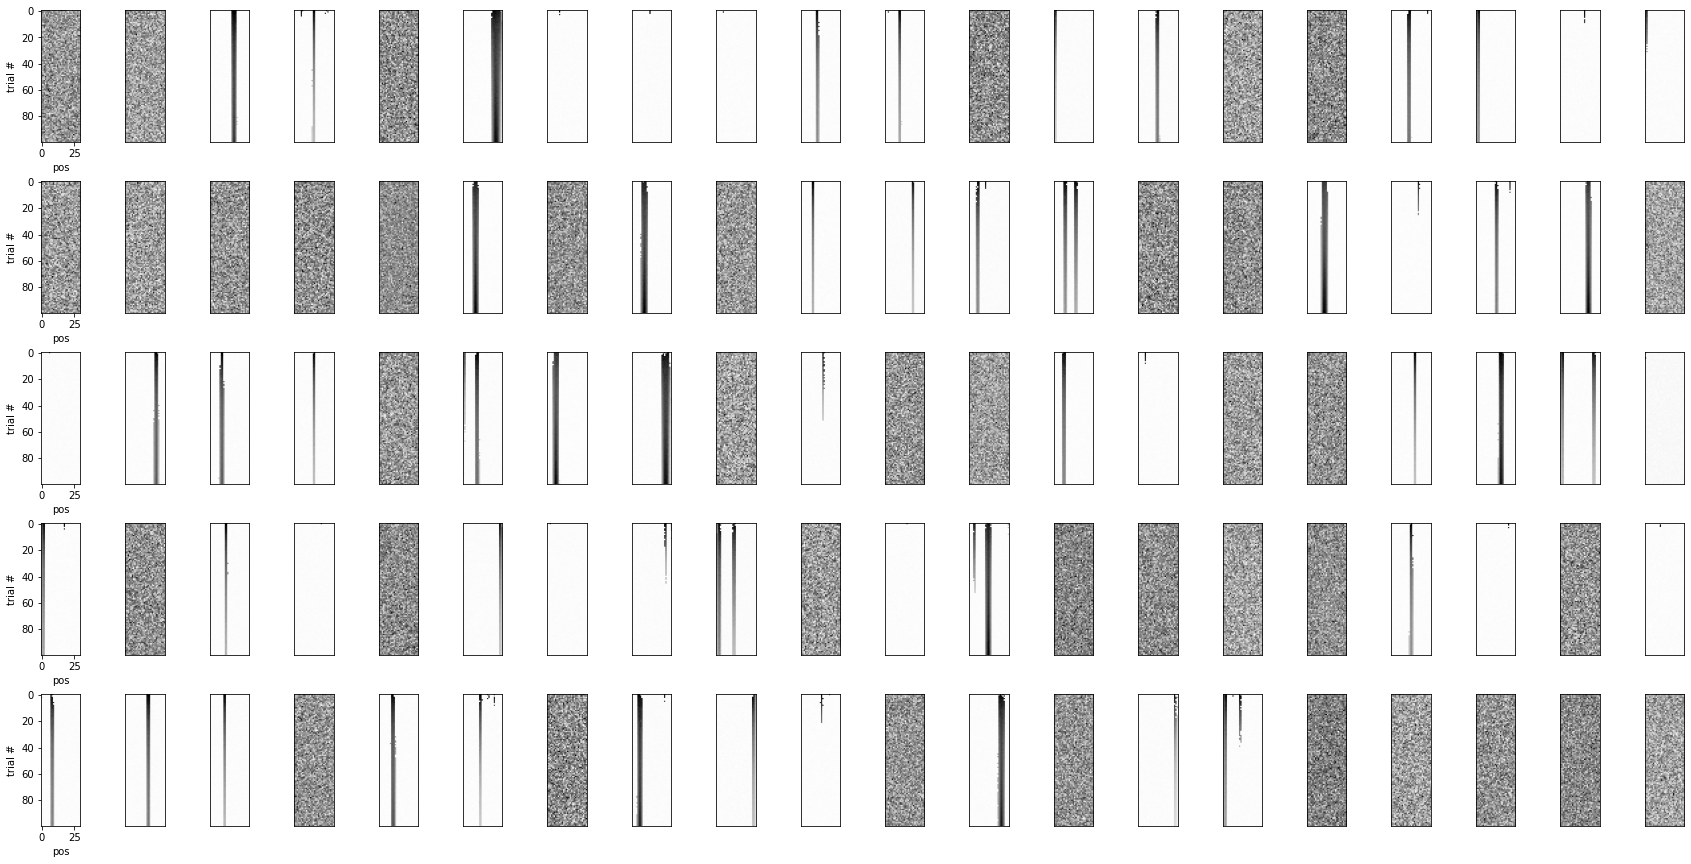

In [8]:
l_singlecell_fig = stx.wta.plot_cells(l_ca1, cell_inds = np.arange(0,100))
l_singlecell_fig.savefig(os.path.join(figdir, "learn_single_cells.pdf"), format='pdf')

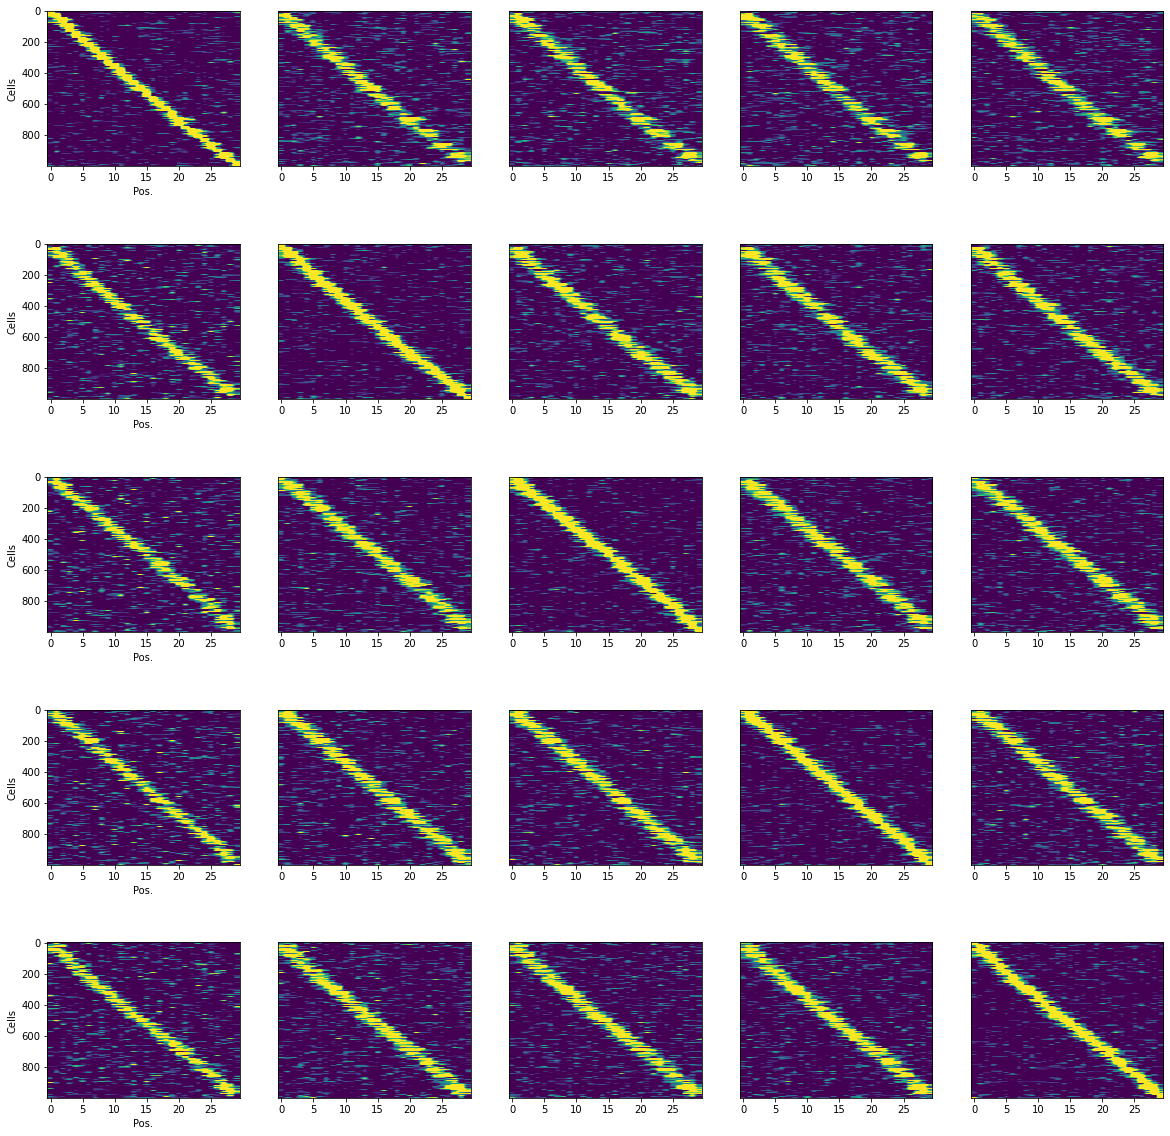

In [9]:
l_pop_fig = stx.wta.plot_pop_activity(l_ca1[::20,:,:])
l_pop_fig.savefig(os.path.join(figdir, "learn_pop_placecells.pdf"), format='pdf')

In [10]:
occ = np.ones([30,])/30
nl_si = tpu.spatial_analyses.spatial_info(nl_ca1[50:,:,:].mean(axis=0),occ)
l_si = tpu.spatial_analyses.spatial_info(l_ca1[50:,:,:].mean(axis=0),occ)

In [11]:
nl_ca1.shape

(100, 30, 1000)

(array([201.,  39.,  31.,  33.,  68., 115., 183., 192., 120.,  18.]),
 array([0.01719519, 0.39872244, 0.7802497 , 1.16177695, 1.54330421,
        1.92483146, 2.30635872, 2.68788597, 3.06941323, 3.45094048,
        3.83246774]),
 <BarContainer object of 10 artists>)

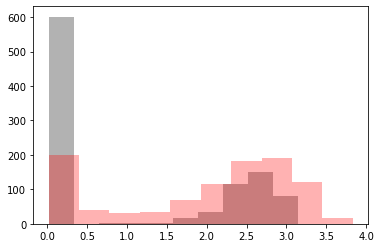

In [12]:
fig,ax = plt.subplots()
ax.hist(l_si, color='black', alpha=.3)
ax.hist(nl_si, color='red', alpha=.3)

In [13]:
l_mask = l_si>1
nl_mask = nl_si>1

l_trial_mat = l_ca1[:,:,l_mask]
l_trial_mat = l_trial_mat[50:,:,:]
nl_trial_mat = nl_ca1[:,:,nl_mask]
nl_trial_mat = nl_trial_mat[50:,:,:]

In [14]:
l_std = stx.spatial_analyses.spatial_std(l_trial_mat[:,:,:].mean(axis=0))
nl_std = stx.spatial_analyses.spatial_std(nl_trial_mat[:,:,:].mean(axis=0))

(742,)


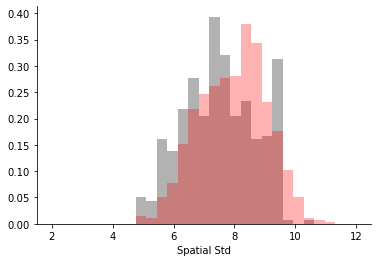

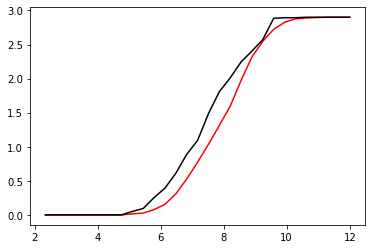

In [15]:
fig,ax = plt.subplots()
bins = np.linspace(2,12, num=30)

print(nl_std.shape)
# nl_sm = tpu.utilities.gaussian(nl_std[:,np.newaxis],.5,bins[np.newaxis,:]).mean(axis=0)
# ax.fill_between(bins, nl_sm, color='red', alpha = .3)
# l_sm = tpu.utilities.gaussian(l_std[:,np.newaxis],.5,bins[np.newaxis,:]).mean(axis=0)
# ax.plot(bins, l_sm, color='black')
# ax.fill_between(bins, l_sm, color='black', alpha = .3)

nl_hist, bins, _ = ax.hist(nl_std, bins = bins, color='red', alpha=.3,density=True, cumulative= False)
l_hist, bins, _ = ax.hist(l_std,bins=bins, color='black', alpha=.3, zorder=-1,density=True, cumulative= False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Spatial Std')
fig.savefig(os.path.join(figdir,'spatial_std.pdf'), format='pdf')

fig, ax = plt.subplots()
ax.plot(bins[1:], np.cumsum(nl_hist), color='red')
ax.plot(bins[1:], np.cumsum(l_hist), color='black')
fig.savefig(os.path.join(figdir,'spatial_std_cumhist.pdf'), format='pdf')

In [16]:
nl_fw = stx.spatial_analyses.field_width(nl_trial_mat[:,:,:].mean(axis=0))
l_fw = stx.spatial_analyses.field_width(l_trial_mat[:,:,:].mean(axis=0))

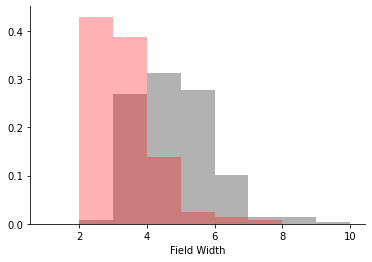

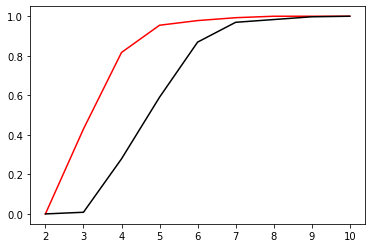

In [21]:
bins = np.arange(1,11)
fig,ax = plt.subplots()
nl_hist, bins, _ = ax.hist(nl_fw, bins = bins, color='red', alpha=.3,density=True)
l_hist, bins, _ = ax.hist(l_fw,bins=bins, color='black', alpha=.3, zorder=-1,density=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Field Width')
fig.savefig(os.path.join(figdir,'field_width.pdf'), format = 'pdf')

fig, ax = plt.subplots()
ax.plot(bins[1:], np.cumsum(nl_hist), color='red')
ax.plot(bins[1:], np.cumsum(l_hist), color='black')
fig.savefig(os.path.join(figdir,'field_width_cumhist.pdf'), format = 'pdf')

In [22]:
l_peaks = stx.spatial_analyses.max_counts(l_trial_mat[:,:,:].mean(axis=0))
nl_peaks = stx.spatial_analyses.max_counts(nl_trial_mat[:,:,:].mean(axis=0))

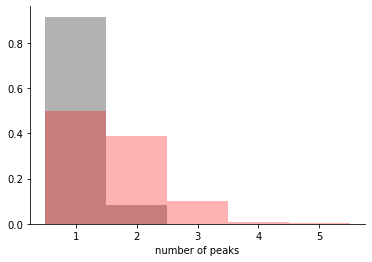

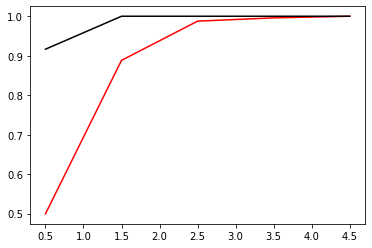

In [25]:
bins = np.arange(0.5,6)
fig,ax = plt.subplots()
nl_hist, bins, _ = ax.hist(nl_peaks[nl_peaks>0], bins = bins, color='red', alpha=.3,density=True)
l_hist, bins, _ = ax.hist(l_peaks[l_peaks>0],bins=bins, color='black', alpha=.3, zorder=-1,density=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('number of peaks')
fig.savefig(os.path.join(figdir,'num_peaks.pdf'), format = 'pdf')

fig, ax = plt.subplots()
ax.plot(bins[:-1], np.cumsum(nl_hist), color='red')
ax.plot(bins[:-1], np.cumsum(l_hist), color='black')
fig.savefig(os.path.join(figdir,'num_peaks_cumhist.pdf'), format = 'pdf')

(array([ 38.,  67.,  88., 126., 165., 145.,  53.,  31.,  18.,  12.]),
 array([ 1.01532546,  3.30103949,  5.58675353,  7.87246756, 10.1581816 ,
        12.44389563, 14.72960967, 17.01532371, 19.30103774, 21.58675178,
        23.87246581]),
 <BarContainer object of 10 artists>)

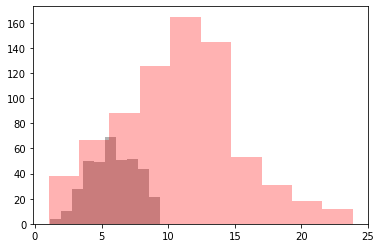

In [49]:
l_ratemap = l_trial_mat[-50:,:,:].mean(axis=0)
l_ratemap/=l_ratemap.mean(axis=0,keepdims=True)
l_smoothness = np.linalg.norm(np.diff(l_ratemap,n=2, axis=0),axis=0)

nl_ratemap = nl_trial_mat[-50:,:,:].mean(axis=0)
nl_ratemap/=nl_ratemap.mean(axis=0,keepdims=True)
nl_smoothness = np.linalg.norm(np.diff(nl_ratemap,n=2, axis=0),axis=0)

fig, ax= plt.subplots()
ax.hist(l_smoothness,color='black',alpha=.3)
ax.hist(nl_smoothness,color='red',alpha=.3)

In [50]:
def kurtosis(avg_trial_mat):
    inds = np.arange(avg_trial_mat.shape[0])[:, np.newaxis]
    avg_trial_mat_norm = avg_trial_mat / (np.nansum(avg_trial_mat, axis=0, keepdims=True) + 1E-5)
    avg_com = (avg_trial_mat_norm * inds).sum(axis=1, keepdims=True)
    avg_std = np.power((np.power(inds - avg_com, 2) * avg_trial_mat_norm).sum(axis=0, keepdims=True), .5)
#     avg_skewness = (np.power((inds - avg_com) / (avg_std + 1E-5), 3) * avg_trial_mat_norm).sum(axis=1)
    avg_kurtosis = (np.power((inds - avg_com) / (avg_std ), 4) * avg_trial_mat_norm).sum(axis=0)
    return avg_kurtosis

In [51]:
print(l_ratemap.shape)
l_kurtosis = kurtosis(l_ratemap)
nl_kurtosis = kurtosis(nl_ratemap)

(30, 378)


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11211306, 0.96944818, 0.92987887, 1.07496635, 0.65948856,
        0.39569314, 0.17146703, 0.16487214, 0.14508748, 0.06594886,
        0.0923284 , 0.03956931, 0.01978466, 0.03297443, 0.01318977,
        0.        , 0.00659489, 0.        , 0.        , 0.00659489,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
         1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
         2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
         3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
         4.08163265,  4.28571429,  4.4

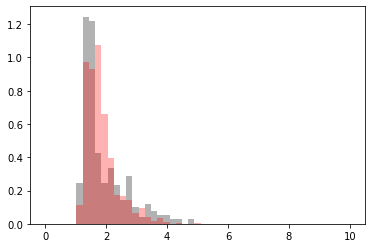

In [52]:
fig,ax = plt.subplots()
bins=np.linspace(0,10)
ax.hist(l_kurtosis,color='black',alpha=.3, bins=bins, cumulative=False, density=True)
ax.hist(nl_kurtosis,color='red',alpha=.3, bins=bins, cumulative=False, density = True)


(378,)


(array([  2., 407., 248.,  73.,  13.]),
 array([0, 1, 2, 3, 4, 5]),
 <BarContainer object of 5 artists>)

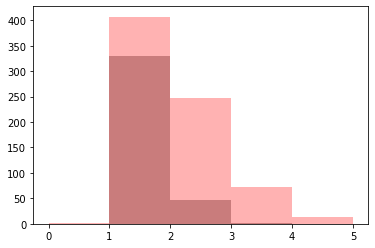

In [53]:
l_ratemap = np.nanmean(l_trial_mat,axis=0)
_l_rm = 0*l_ratemap
_l_rm[l_ratemap>l_trial_mat.mean(axis=0).mean(axis=1, keepdims=True)]=1
# _l_rm[l_ratemap>np.percentile(l_trial_mat.mean(axis=0),75, axis=0,keepdims=True)]=1

l_rm = np.zeros([l_ratemap.shape[0]+1, l_ratemap.shape[1]])
l_rm[1:,:] = _l_rm

l_numfields = np.count_nonzero(l_rm[1:,:]>l_rm[:-1,:], axis=0)

print(l_numfields.shape)
    
fig,ax = plt.subplots()
ax.hist(l_numfields, bins = np.arange(6), color = 'black', alpha = .3)

nl_ratemap = np.nanmean(nl_trial_mat,axis=0)
_nl_rm = 0*nl_ratemap
_nl_rm[nl_ratemap>nl_trial_mat.mean(axis=0).mean(axis=1, keepdims=True)]=1

nl_rm = np.zeros([nl_ratemap.shape[0]+1, nl_ratemap.shape[1]])
nl_rm[1:,:] = _nl_rm

nl_numfields = np.count_nonzero(nl_rm[1:,:]>nl_rm[:-1,:], axis=0)

ax.hist(nl_numfields, bins = np.arange(6), color='red', alpha = .3)


In [27]:


def get_field_stats(field_mask):
#     sigfield_cells = field_mask.sum(axis=0)>0
    _field_mask = np.zeros([field_mask.shape[0]+2, field_mask.shape[1]])
    _field_mask[1:-1,:]=field_mask
#     _field_mask = _field_mask[:,sigfield_cells]
    
    rising_edges, falling_edges = np.argwhere((_field_mask[1:,:]>_field_mask[:-1,:]).T), np.argwhere((_field_mask[:-1,:]>_field_mask[1:,:]).T)
    field_widths = falling_edges[:,1]-rising_edges[:,1]
    print(field_widths.shape, rising_edges.shape)
#     mask = field_widths>2
#     rising_edges, falling_edges, field_widths = rising_edges[mask,:], falling_edges[mask,:], field_widths[mask]
    
#     num_fields = (_field_mask[1:, :]>_field_mask[:-1, :]).sum(axis=0)
    num_fields = np.bincount(rising_edges[:,0])
    
    return rising_edges, falling_edges, field_widths, num_fields
    
    

def field_masks(trial_mat, n_perms = 1000, pcnt = 99):
           
    shuff_mat = np.zeros([1000, *trial_mat.shape[1:]])
    n_trials = trial_mat.shape[0]

    shuffs = rng.integers(trial_mat.shape[1], size = [n_perms, trial_mat.shape[0]])

    # calculate shuffles
    _tmat = 0*trial_mat
    for perm in range(n_perms):
        for trial in range(n_trials):
            _tmat[trial,:,:] = np.roll(trial_mat[trial,:,:], shuffs[perm, trial])
        shuff_mat[perm,:,:] = np.nanmean(_tmat, axis=0)

    thresh = np.nanpercentile(shuff_mat,pcnt, axis=0)
    field_mask = 1*(np.nanmean(trial_mat,axis=0)>thresh)
    rising_edges, falling_edges, field_widths, num_fields = get_field_stats(field_mask)
    return {'field_mask': field_mask, 
            'rising_edges': rising_edges, 
            'falling_edges': falling_edges, 
            'field_widths': field_widths,
            'num_fields': num_fields}

    




In [28]:
l_field_res = field_masks(l_trial_mat[:,:,:])

(431,) (431, 2)


In [29]:
nl_field_res = field_masks(nl_trial_mat[:,:,:])

(1045,) (1045, 2)


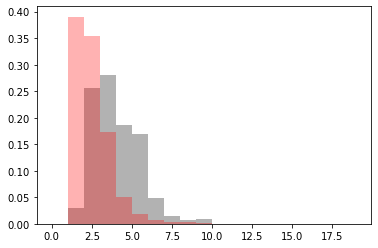

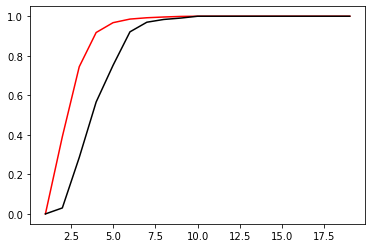

In [30]:
fig, ax = plt.subplots()
l_fw = l_field_res['field_widths']
bins = np.arange(20)
l_hist, _bins, _ = ax.hist(l_fw[l_fw>=0], bins = bins, color='black', alpha = .3, density = True)
nl_fw = nl_field_res['field_widths']
nl_hist, _bins, _ = ax.hist(nl_fw[nl_fw>=0], bins = bins, color='red', alpha = .3, density = True)
fig.savefig(os.path.join(figdir,'sig_field_width.pdf'), format = 'pdf')

fig, ax = plt.subplots()
ax.plot(_bins[1:], np.cumsum(nl_hist), color='red')
ax.plot(_bins[1:], np.cumsum(l_hist), color='black')
fig.savefig(os.path.join(figdir,'sig_field_width_cumhist.pdf'), format = 'pdf')

(398,) (431,)


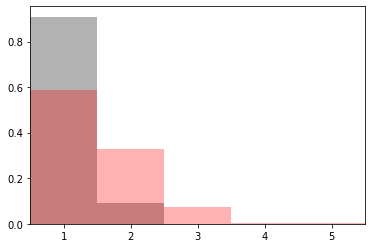

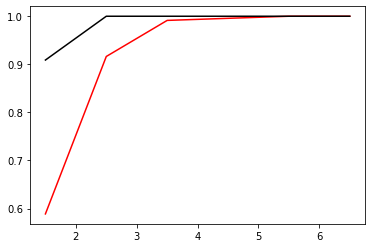

In [31]:

fig, ax = plt.subplots()
bins = np.arange(0.5,7)
dat = l_field_res['num_fields']
print(dat.shape,l_fw.shape)
l_hist, _bins, _ = ax.hist(dat[dat>0] , bins = bins, color= 'black', alpha = .3, density = True)
dat = nl_field_res['num_fields']
nl_hist, _bins, _ = ax.hist(dat[dat>0] , bins = bins, color= 'red', alpha = .3, density = True)
ax.set_xlim([.5,5.5])
fig.savefig(os.path.join(figdir,'sig_field_count.pdf'), format = 'pdf')

fig, ax = plt.subplots()
ax.plot(_bins[1:], np.cumsum(nl_hist), color='red')
ax.plot(_bins[1:], np.cumsum(l_hist), color='black')
fig.savefig(os.path.join(figdir,'sig_field_count_cumhist.pdf'), format = 'pdf')

In [32]:
l_field_res['rising_edges'].shape


(431, 2)

In [121]:
l_var = []
for field in range(l_field_res['rising_edges'].shape[0]):
    ledge, redge = l_field_res['rising_edges'][field,1], l_field_res['falling_edges'][field,1]
    
    fieldmat = l_trial_mat[:,ledge:redge, l_field_res['rising_edges'][field,0]].mean(axis=1)
    fieldmat_norm = fieldmat/np.amax(fieldmat)
    l_var.append(fieldmat_norm.var())
    
nl_var = []
for field in range(nl_field_res['rising_edges'].shape[0]):
    ledge, redge = nl_field_res['rising_edges'][field,1], nl_field_res['falling_edges'][field,1]
    
    fieldmat = nl_trial_mat[:,ledge:redge, nl_field_res['rising_edges'][field,0]].mean(axis=1)
    fieldmat_norm = fieldmat/np.amax(fieldmat)
    nl_var.append(fieldmat_norm.var())
        

(array([5.1627907 , 8.65116279, 8.3255814 , 8.55813953, 4.        ,
        1.1627907 , 0.13953488, 0.        , 0.        ]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ]),
 <BarContainer object of 9 artists>)

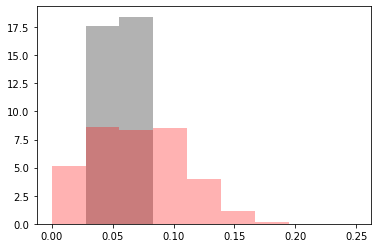

In [122]:
fig, ax = plt.subplots()
ax.hist(l_var, bins = np.linspace(0,.25, num=10), density= True, color='black', alpha = .3)
ax.hist(nl_var, bins = np.linspace(0,.25, num=10), density= True, color='red', alpha = .3)